# Poços de Petróleo e Gás no Brasil (até janeiro/2018)

**Faculdade**: FATEC Jessen Vidal de São José dos Campos  
**Curso**: TBI004 - Projeto de Banco de Dados Não Estruturados (1º semestre de 2018)  

**Aluno**: Felipe Koblinger  
**Professor**: Me. Fernando Masanori Ashikaga

**Dataset**: https://www.kaggle.com/dtommasini/oil-gas-wells-brazil

## Indíce
1. [Explorações](#1.-Explorações)
2. [Estados que mais utilizaram poços para explorações](#2.-Estados-que-mais-utilizaram-poços-para-explorações)
3. [Estados que mais utilizaram poços para produção](#3.-Estados-que-mais-utilizaram-poços-para-produção)
4. [Movimentações Anuais](#4.-Movimentações-Anuais)
5. [As empresas que mais utilizaram os poços para explorações](#5.-As-empresas-que-mais-utilizaram-os-poços-para-explorações)
6. [As empresas que mais utilizaram os poços para produção](#6.-As-empresas-que-mais-utilizaram-os-poços-para-produção)
7. [Poços que atrasaram sua conclusão](#7.-Poços-que-atrasaram-sua-conclusão)
8. [Mapa das escavações realizadas ao longo da história](#8.-Mapa-das-escavações-realizadas-ao-longo-da-história)
9. [Situação dos poços iniciados nos últimos 5 anos](#9.-Situação-dos-poços-iniciados-nos-últimos-5-anos)
10. [As sondas mais utilizadas nos poços brasileiros](#10.-As-sondas-mais-utilizadas-nos-poços-brasileiros)
11. [Profundidade dos poços](#11.-Profundidade-dos-poços)
12. [Poços terrestres e poços marítimos](#12.-Poços-terrestres-e-poços-marítimos)
13. [Bacias com mais atividades ao longo da história](#13.-Bacias-com-mais-atividades-ao-longo-da-história)
14. [Categorias com mais atividades ao longo da história](#14.-Categorias-com-mais-atividades-ao-longo-da-história)
15. [Estados com mais atividades de desenvolvimento ao longo da história](#15.-Estados-com-mais-atividades-de-desenvolvimento-ao-longo-da-história)

### Configurações Iniciais

In [15]:
import pandas as pd
import seaborn as sb
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap

# Style
plt.style.use('Solarize_Light2')

# List all available themes (uncomment the line below)
#print(plt.style.available)

low_memory = False
%matplotlib inline

# Setting retina display for plots
%config InlineBackend.figure_format = 'retina'

pd.options.display.max_columns = 80
pd.options.display.max_rows = 90

### Carregando arquivo Excel e definindo DataFrame

In [5]:
filename = 'datasets/tabela_de_pocos_janeiro_2018.xlsx'
df = pd.read_excel(filename, sheet_name='Plan1')

### Informações do DataFrame

In [55]:
df.shape

(29575, 59)

In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29575 entries, 0 to 29574
Data columns (total 59 columns):
POCO                          29575 non-null object
CADASTRO                      29575 non-null int64
OPERADOR                      26643 non-null object
POCO_OPERADOR                 28870 non-null object
ESTADO                        29575 non-null object
BACIA                         29575 non-null object
BLOCO                         26254 non-null object
SIG_CAMPO                     24954 non-null object
CAMPO                         24954 non-null object
TERRA_MAR                     29575 non-null object
POCO_POS_ANP                  29575 non-null object
TIPO                          29575 non-null object
CATEGORIA                     29575 non-null object
RECLASSIFICACAO               27972 non-null object
SITUACAO                      28751 non-null object
INICIO                        29575 non-null datetime64[ns]
TERMINO                       27729 non-null datetim

### Exemplo dos dados contidos no DataFrame

In [124]:
df.sample(5)

,POCO,CADASTRO,OPERADOR,POCO_OPERADOR,ESTADO,BACIA,BLOCO,SIG_CAMPO,CAMPO,TERRA_MAR,POCO_POS_ANP,TIPO,CATEGORIA,RECLASSIFICACAO,SITUACAO,INICIO,TERMINO,CONCLUSAO,TITULARIDADE,LATITUDE_BASE_4C,LONGITUDE_BASE_4C,LATITUDE_BASE_DD,LONGITUDE_BASE_DD,DATUM_HORIZONTAL,TIPO_DE_COORDENADA_DE_BASE,DIRECAO,PROFUNDIDADE_VERTICAL_M,PROFUNDIDADE_SONDADOR_M,PROFUNDIDADE_MEDIDA_M,REFERENCIA_DE_PROFUNDIDADE,MESA_ROTATIVA,COTA_ALTIMETRICA_M,LAMINA_D_AGUA_M,DATUM_VERTICAL,UNIDADE_ESTRATIGRAFICA,GEOLOGIA_GRUPO_FINAL,GEOLOGIA_FORMACAO_FINAL,GEOLOGIA_MEMBRO_FINAL,CDPE,AGP,PC,PAG,PERFIS_CONVENCIONAIS,DURANTE_PERFURACAO,PERFIS_DIGITAIS,PERFIS_PROCESSADOS,PERFIS_ESPECIAIS,AMOSTRA_LATERAL,SISMICA,TABELA_TEMPO_PROFUNDIDADE,DADOS_DIRECIONAIS,TESTE_A_CABO,TESTE_DE_FORMACAO,CANHONEIO,TESTEMUNHO,GEOQUIMICA,SIG_SONDA,NOM_SONDA,DHA_ATUALIZACAO
18643,7MG 0174 BA,202400260700,Petrobras,7MG 0174 BA,BA,Recôncavo,MG,MG,MIRANGA,T,N,Explotatório,Desenvolvimento,PRODUTOR COMERCIAL DE PETRÓLEO,"EM INTERVENÇÃO PARA AVALIAÇÃO, COMPLETAÇÃO OU ...",1971-11-22,1971-12-14,1971-12-14,Público,"-12:20:37,622","-38:12:40,997","-12,3437838888","-38,2113880555",SIRGAS2000,Definitiva,Vertical,NaN,1250.0,NaN,MR,69.30,NaN,NaN,NaN,M CATU,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Existe,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,SC-51,SONDA CONVENCIONAL 51,2018-01-28 05:00:06
7889,7-FP-442D-RN,72100028444,Petrobras,7FP442DRN,RN,Potiguar,NaN,FP,FAZENDA POCINHO,T,S,Explotatório,Desenvolvimento,PRODUTOR COMERCIAL DE PETRÓLEO,PRODUTOR,2015-09-12,2015-09-17,2015-10-15,Público,"-05:15:07,148","-36:32:26,856","-5,2519855555","-36,5407933333",SIRGAS2000,Definitiva,Direcional,452.8,471.7,472.0,MR,19.21,14.26,0.0,NM,NaN,Apodi,Açu,NaN,Existe,NaN,NaN,NaN,Existe,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Existe,NaN,NaN,NaN,NaN,NaN,EBS-05,EBS-05,2018-01-28 05:00:06
11219,7ET 0186 RN,721000172500,Petrobras,7ET 0186 RN,RN,Potiguar,ET,ET,ESTREITO,T,N,Explotatório,Desenvolvimento,PRODUTOR COMERCIAL DE PETRÓLEO,INJETOR,1984-03-24,1984-03-24,1984-03-24,Público,"-05:23:40,988","-36:53:44,401","-5,3947188888","-36,8956669444",SIRGAS2000,Definitiva,Vertical,NaN,281.0,NaN,MR,35.00,NaN,NaN,NaN,MRCO. I,NaN,NaN,NaN,NaN,Existe,NaN,NaN,NaN,NaN,Existe,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,SC-63,SONDA CONVENCIONAL 63,2018-01-28 05:00:06
15839,7MG 0047 BA,202400193900,Petrobras,7MG 0047 BA,BA,Recôncavo,MG,MG,MIRANGA,T,N,Explotatório,Desenvolvimento,ABANDONADO POR ACIDENTE MECÂNICO,ABANDONADO DEFINITIVAMENTE,1966-05-25,1966-06-08,1966-06-08,Público,"-12:20:55,438","-38:11:56,329","-12,3487327777","-38,1989802777",SIRGAS2000,Definitiva,Vertical,NaN,401.6,NaN,MR,92.30,NaN,NaN,NaN,F SAOSEB,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,SC-37,SONDA CONVENCIONAL 37,2018-01-28 05:00:06
24274,3RUC 0003 AM,140200058400,Petrobras,3RUC 0003 AM,AM,Solimões,RUC,RUC,RIO URUCU,T,N,Exploratório,Extensão,"EXTENSÃO PARA PETRÓLEO, GÁS NATURAL E CONDENSADO",PRODUTOR,1987-08-29,1987-11-14,1987-11-14,Público,"-04:53:31,220","-65:19:05,862","-4,8920055555","-65,318295",SIRGAS2000,Definitiva,Vertical,NaN,2599.0,NaN,MR,67.50,NaN,NaN,NaN,MRCO 110,NaN,NaN,NaN,NaN,Existe,Existe,NaN,NaN,NaN,Existe,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,SC-96,SONDA CONVENCIONAL 96,2018-01-28 05:00:06


### Tratamento de dados no DataFrame

In [6]:
def convert_brazil_number(value):
    new_value = value.replace(',','.')
    return float(new_value)

# Pesquisa sobre Locale

df['LONGITUDE_BASE_DD'] = df['LONGITUDE_BASE_DD'].apply(convert_brazil_number)
df['LATITUDE_BASE_DD'] = df['LATITUDE_BASE_DD'].apply(convert_brazil_number)

df['DIFERENCA_TERMINO_CONCLUSAO'] = (df['TERMINO'] - df['CONCLUSAO']).dt.days

## 1. Explorações
- Explotatório: poços de produção
- Exploratório: poços de exploração

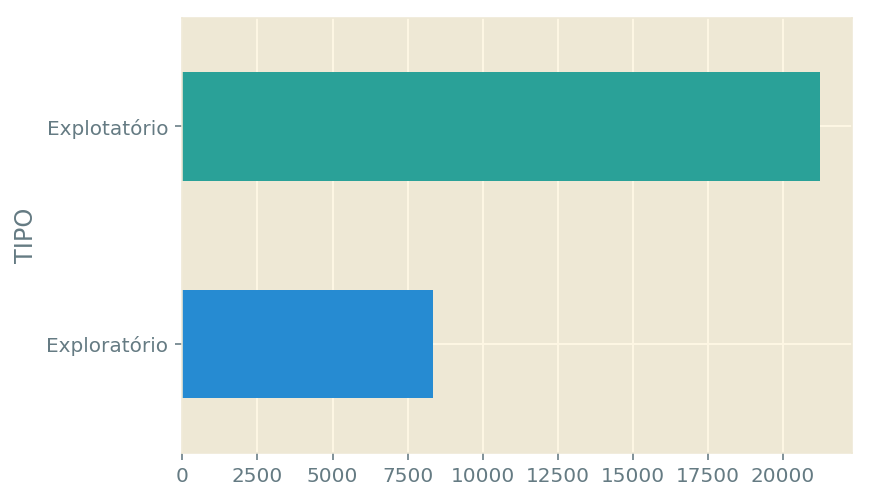

In [18]:
df.groupby('TIPO').size().sort_values().plot(kind='barh');

## 2. Estados que mais utilizaram poços para explorações

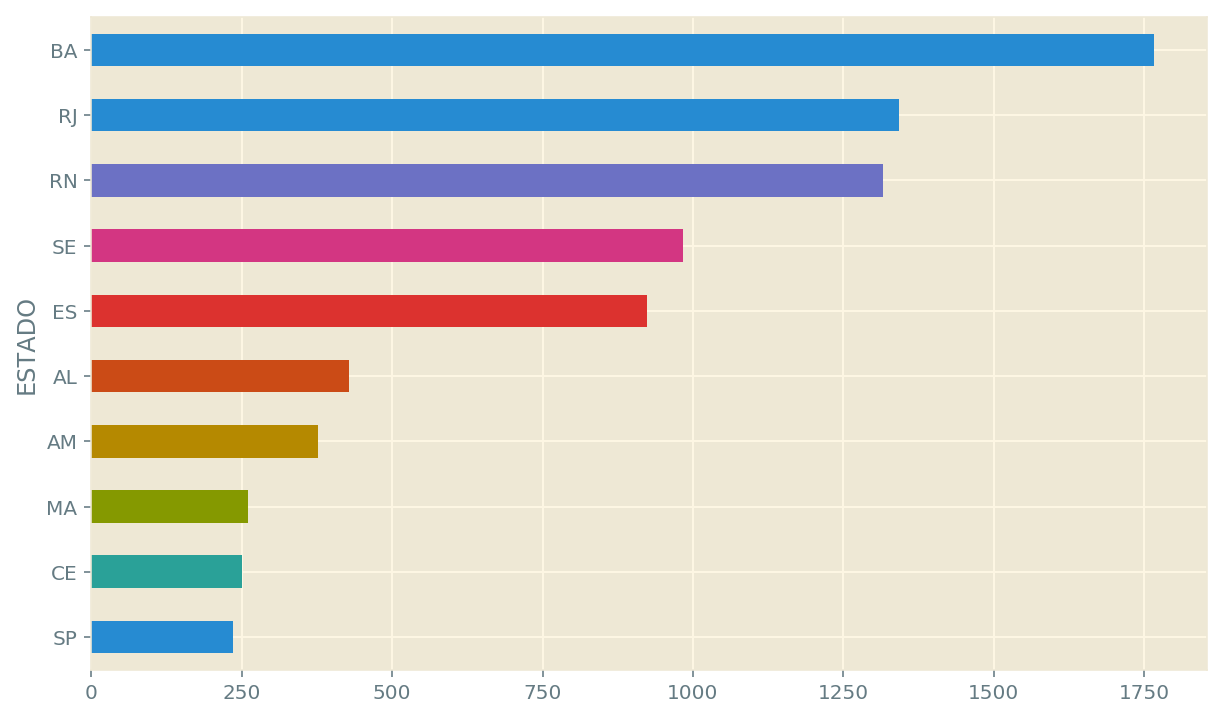

In [19]:
df.query('TIPO == "Exploratório"').groupby('ESTADO').size().sort_values().tail(10).plot(kind='barh', figsize=(10,6));

## 3. Estados que mais utilizaram poços para produção

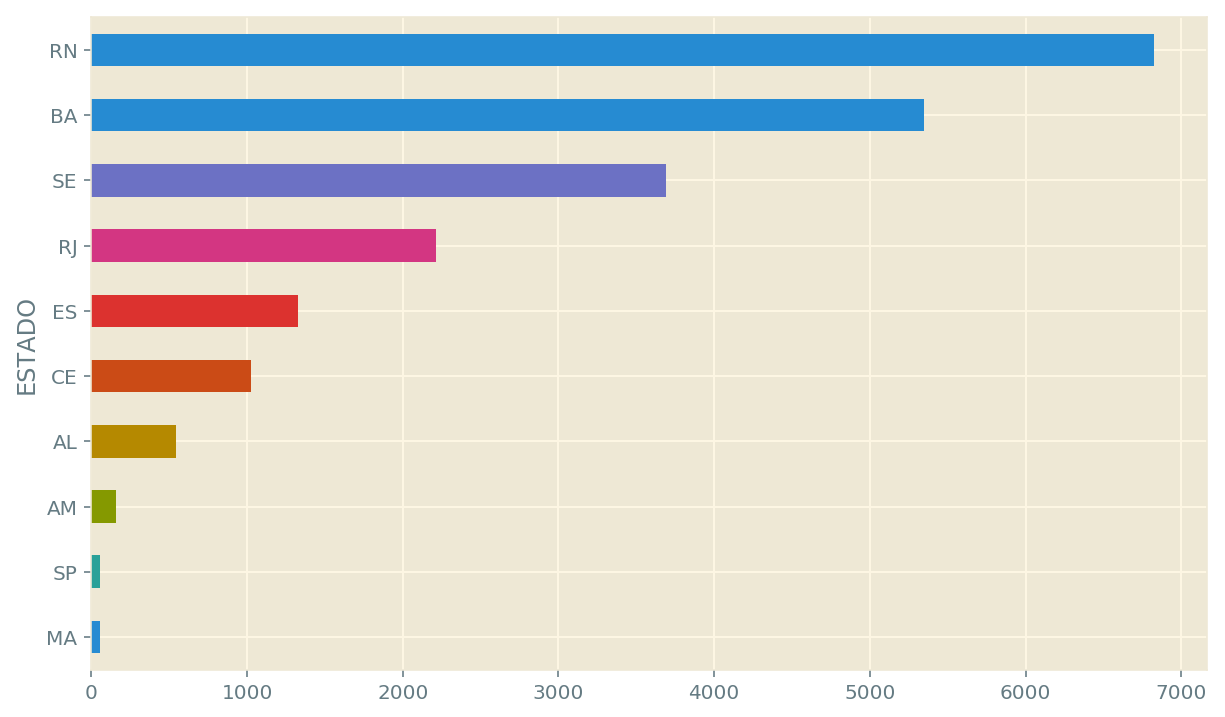

In [119]:
df.query('TIPO == "Explotatório"').groupby('ESTADO').size().sort_values().tail(10).plot(kind='barh', figsize=(10,6));

## 4. Movimentações Anuais

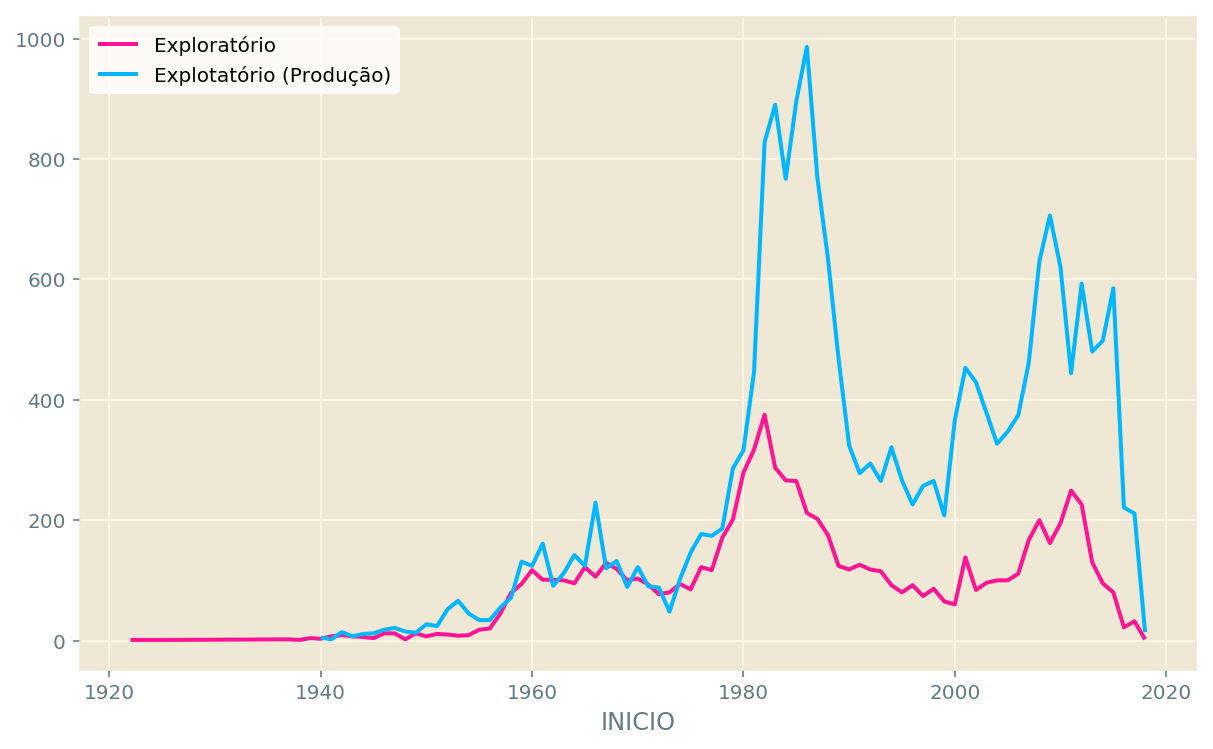

In [30]:
exploration = df.query('TIPO == "Exploratório"').groupby(df['INICIO'].map(lambda x: x.year)).size()
production = df.query('TIPO == "Explotatório"').groupby(df['INICIO'].map(lambda x: x.year)).size()

exploration_plot = exploration.plot(color='#ff1493')
production_plot = production.plot(ax = exploration_plot, color='#03b7ff', figsize=(10,6))

production_plot.legend(loc='upper left', labels=['Exploratório', 'Explotatório (Produção)'], facecolor="#FFFFFF", edgecolor="#FFFFFF");

### 5. As empresas que mais utilizaram os poços para explorações

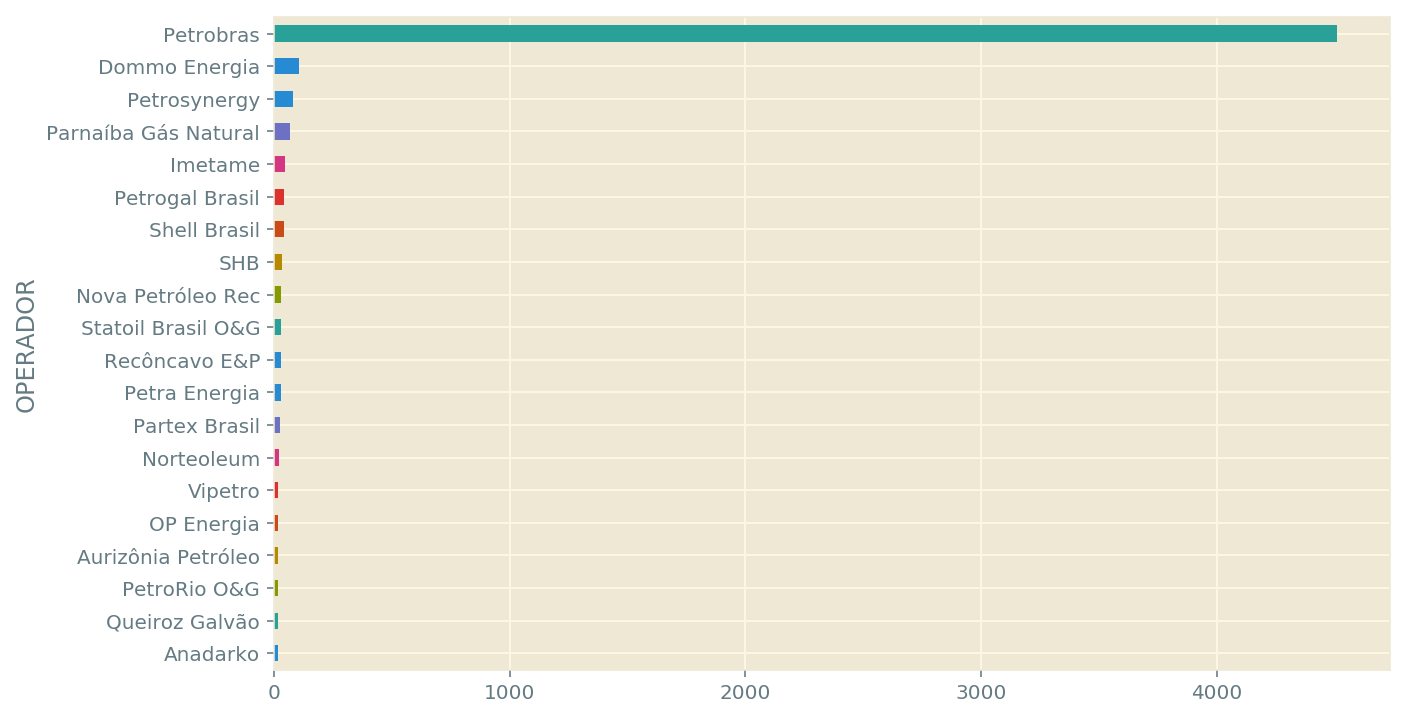

In [32]:
df.query('TIPO == "Exploratório"').groupby('OPERADOR').size().sort_values().tail(20).plot(kind='barh', figsize=(10,6));

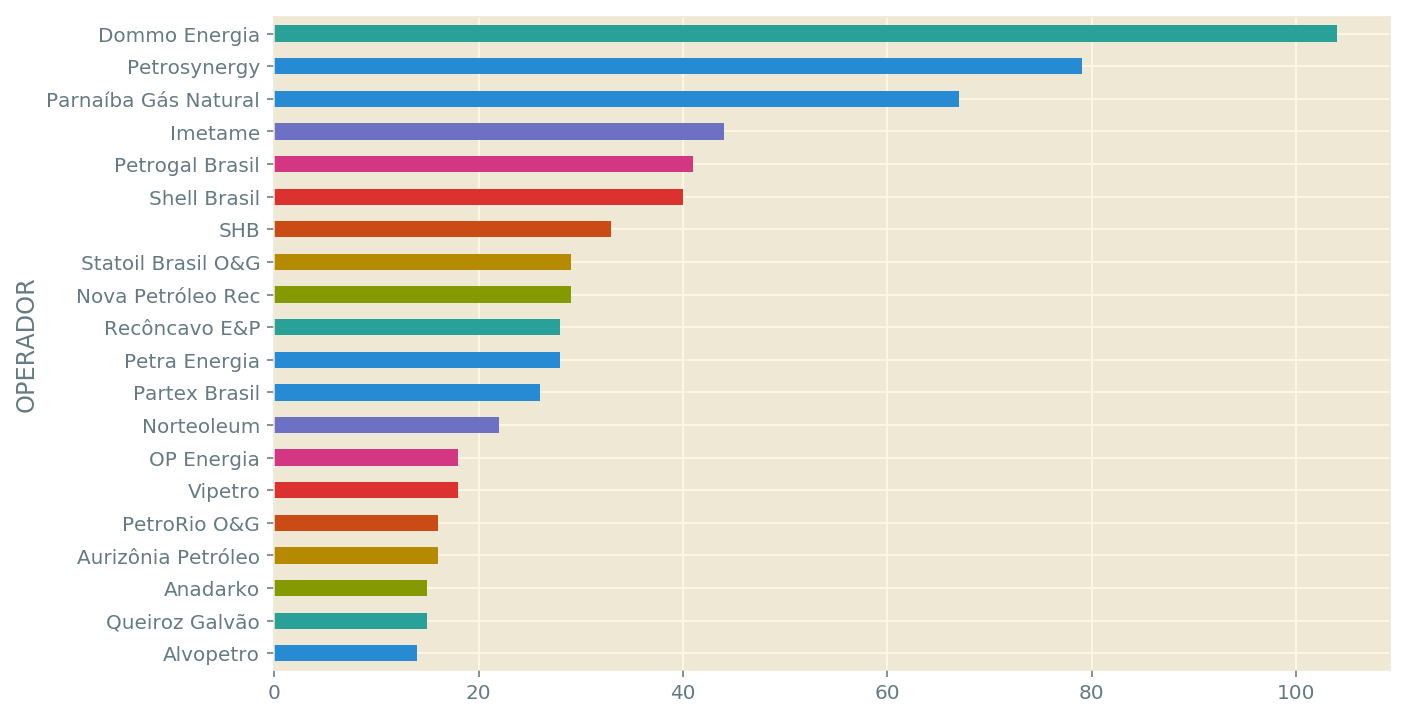

In [34]:
df.query('TIPO == "Exploratório" & OPERADOR != "Petrobras"').groupby('OPERADOR').size().sort_values().tail(20).plot(kind='barh', figsize=(10,6));

### 6. As empresas que mais utilizaram os poços para produção

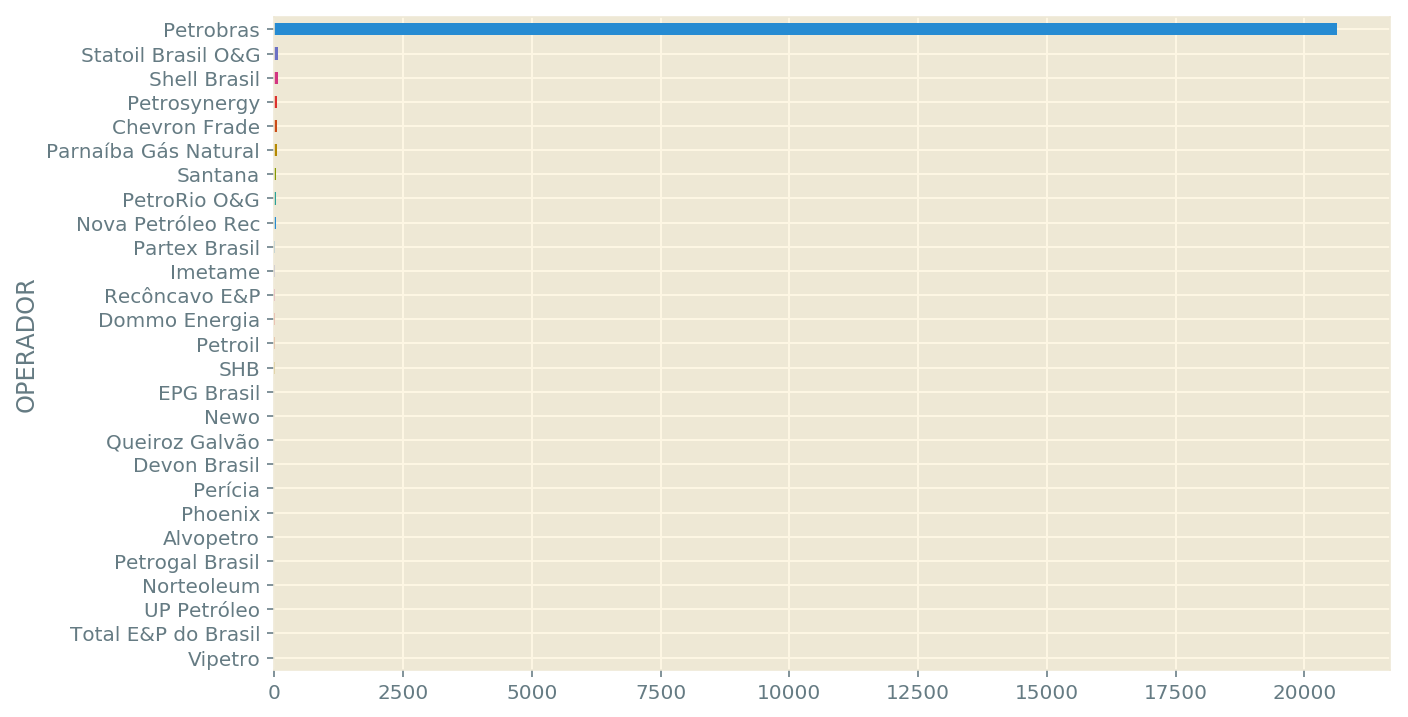

In [13]:
df.query('TIPO == "Explotatório"').groupby('OPERADOR').size().sort_values().plot(kind='barh', figsize=(10,6));

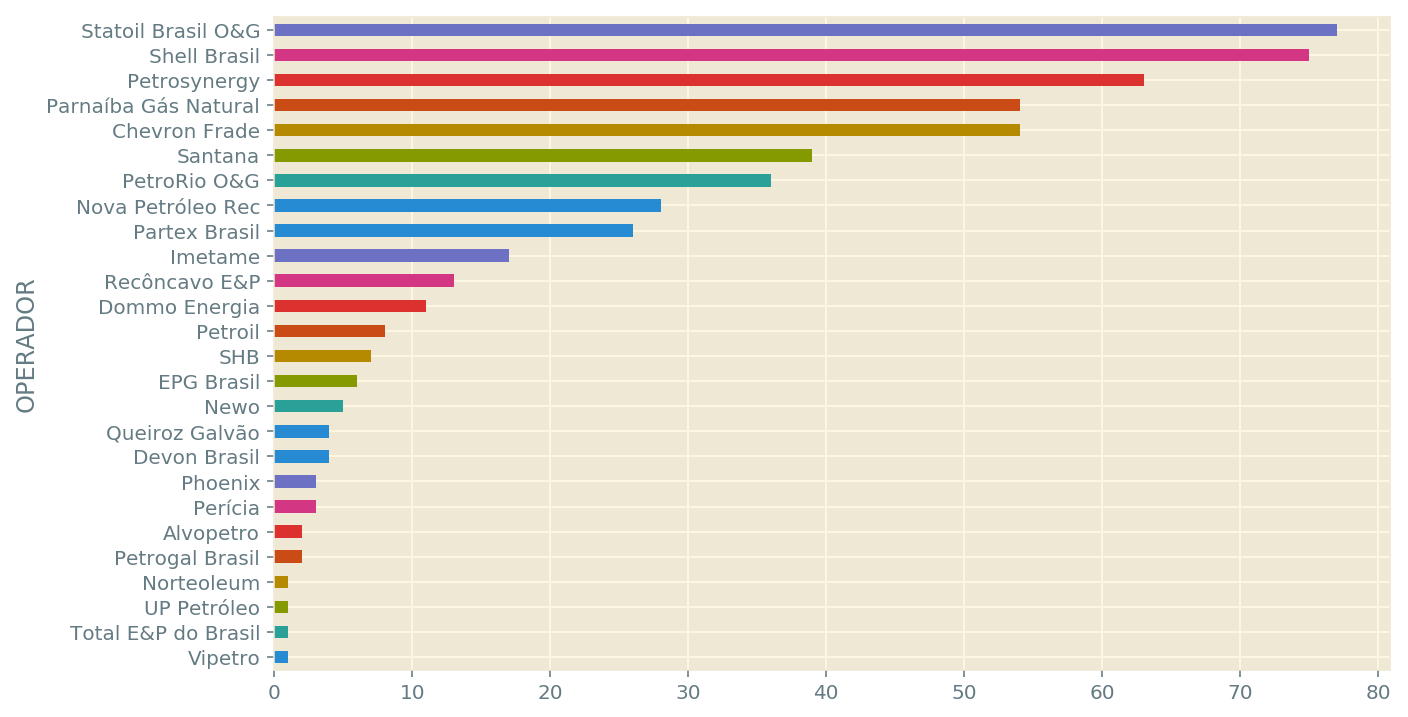

In [35]:
df.query('TIPO == "Explotatório" & OPERADOR != "Petrobras"').groupby('OPERADOR').size().sort_values().plot(kind='barh', figsize=(10,6));

### 7. Poços que atrasaram sua conclusão

In [91]:
df.query('DIFERENCA_TERMINO_CONCLUSAO < 0')['DIFERENCA_TERMINO_CONCLUSAO'].count()

7630

In [92]:
df.query('DIFERENCA_TERMINO_CONCLUSAO < 0').sort_values(by='DIFERENCA_TERMINO_CONCLUSAO').head(10) \
.loc[:, ['DIFERENCA_TERMINO_CONCLUSAO', 'POCO', 'OPERADOR', 'ESTADO', 'INICIO', 'TERMINO', 'CONCLUSAO']]

,DIFERENCA_TERMINO_CONCLUSAO,POCO,OPERADOR,ESTADO,INICIO,TERMINO,CONCLUSAO
2444,-2311.0,7-JND-22D-BA,Petrobras,BA,2006-11-29,2006-12-08,2013-04-06
12285,-2009.0,9-CG-9-RJS,Petrobras,RJ,2011-02-10,2011-04-20,2016-10-19
28660,-1696.0,1-BRSA-63-RN,Petrobras,RN,2001-04-18,2001-05-24,2006-01-14
7571,-1567.0,8-PPT-9HP-RJS,Petrobras,RJ,2012-08-04,2012-08-08,2016-11-22
26983,-1450.0,7-FBL-19D-BA,Petrobras,BA,2009-10-19,2009-10-29,2013-10-18
3648,-1278.0,8-JND-12DP-BA,Petrobras,BA,2006-01-31,2006-02-16,2009-08-17
6596,-1274.0,9-PPT-26D-RJS,Petrobras,RJ,2013-05-25,2013-05-28,2016-11-22
8334,-1201.0,7-PPT-25H-RJS,Petrobras,RJ,2013-08-08,2013-08-09,2016-11-22
8393,-1196.0,7-PPT-33H-RJS,Petrobras,RJ,2013-08-12,2013-08-14,2016-11-22
26822,-1178.0,9-MLL-19D-RJS,Petrobras,RJ,2004-12-17,2005-01-05,2008-03-28


### 8. Mapa das escavações realizadas ao longo da história

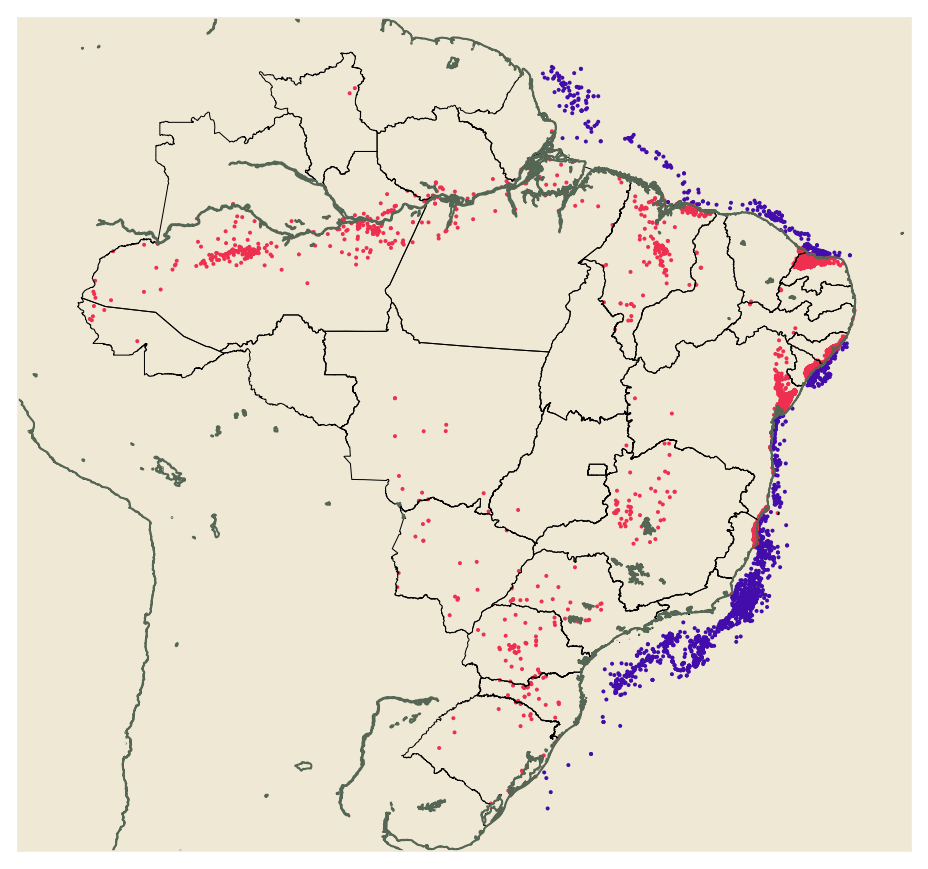

In [123]:
f, ax = plt.subplots(figsize=(8,8))

colors = np.where(df["TERRA_MAR"] == 'T','#ef2f4f','#420dab')

ax.scatter(df['LONGITUDE_BASE_DD'],
           df['LATITUDE_BASE_DD'],
           1, c=colors)

m = Basemap(llcrnrlat=-35, urcrnrlat=7,
            llcrnrlon=-77, urcrnrlon=-32, resolution='f')
m.ax = ax
m.readshapefile('shapefiles/brazil/BRUFE250GC_SIR', 'states', drawbounds=True)

m.drawcoastlines(color='#556655', linewidth=1);

#Folium

### 9. Situação dos poços iniciados nos últimos 5 anos

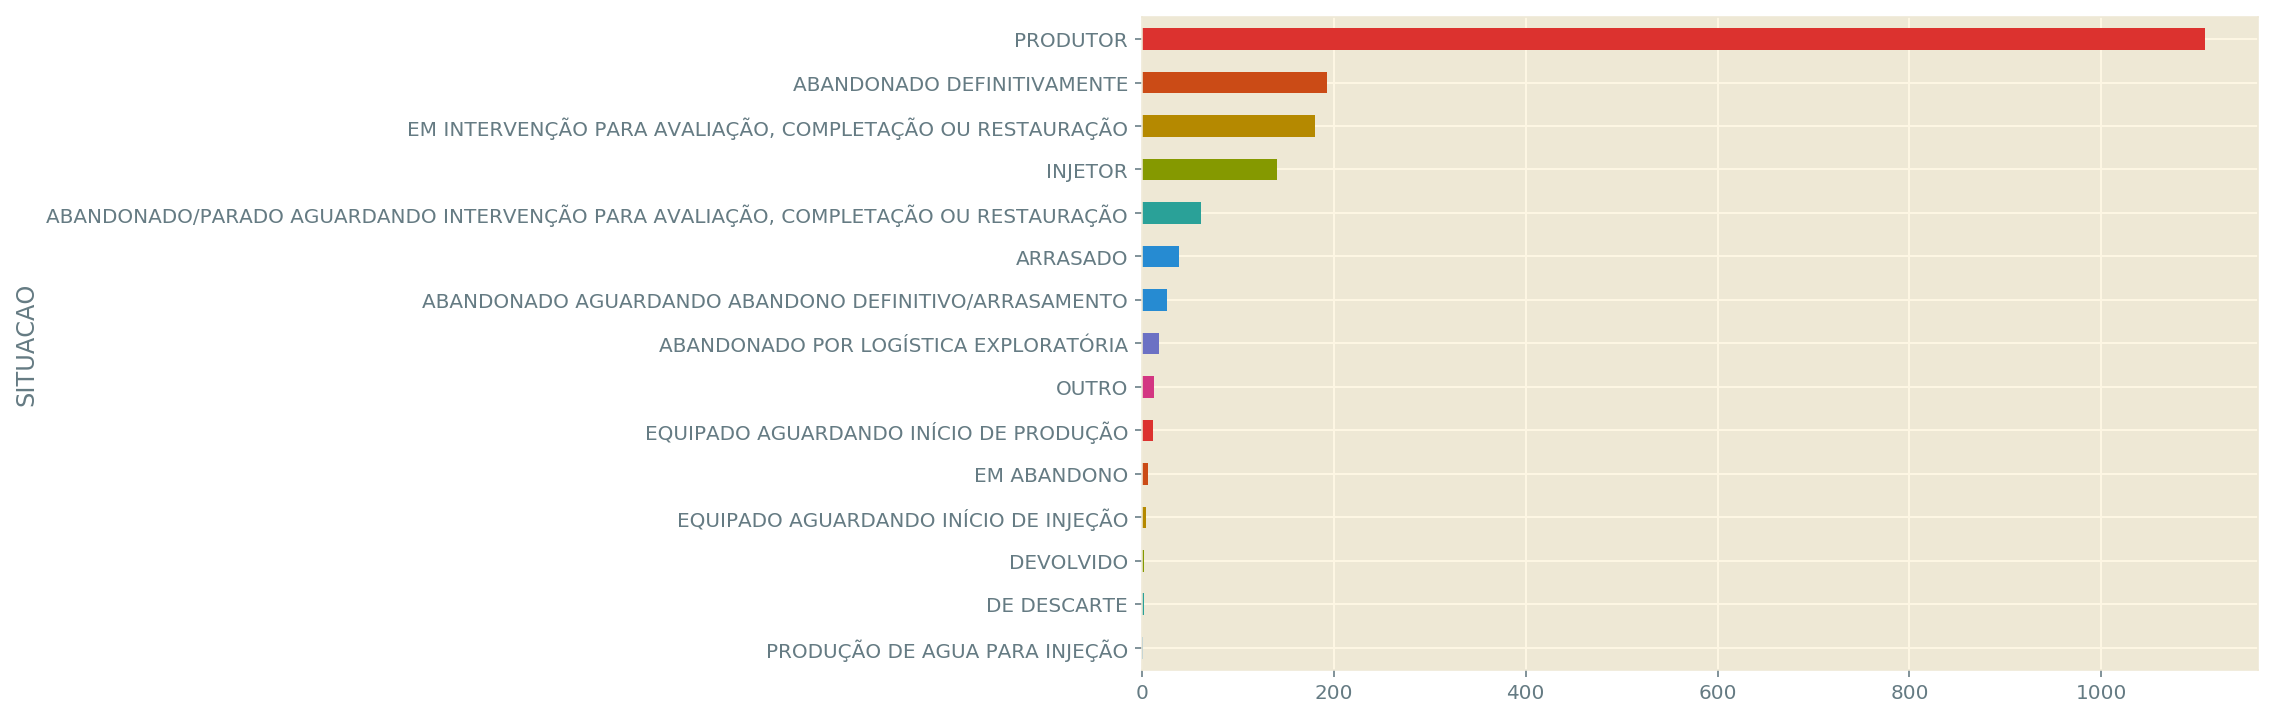

In [88]:
df.query('INICIO > "2013-1-1"').groupby('SITUACAO').size().sort_values().plot(kind='barh',figsize=(10,6));

### 10. As sondas mais utilizadas nos poços brasileiros

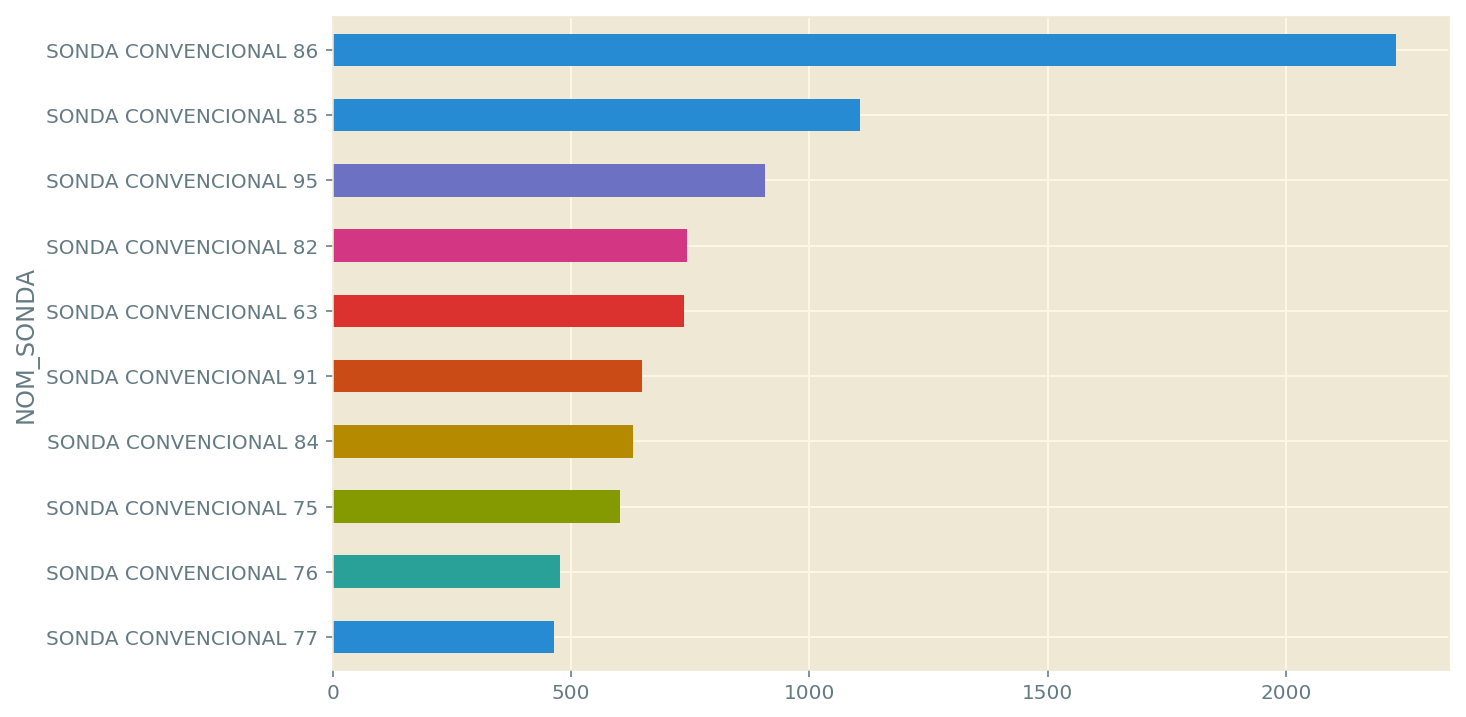

In [93]:
df.groupby('NOM_SONDA').size().sort_values().tail(10).plot(kind='barh',figsize=(10,6));

### 11. Profundidade dos poços

In [102]:
df.sort_values(by='PROFUNDIDADE_MEDIDA_M', ascending=False).head(10) \
.loc[:, ['PROFUNDIDADE_MEDIDA_M', 'POCO', 'OPERADOR', 'ESTADO', 'INICIO', 'TERMINO', 'CONCLUSAO']]

,PROFUNDIDADE_MEDIDA_M,POCO,OPERADOR,ESTADO,INICIO,TERMINO,CONCLUSAO
8944,8080.20,7-PRG-49H-RJS,Statoil Brasil O&G,RJ,2015-06-28,2015-08-21,2015-09-06
5400,7633.40,1-REPF-7A-ESS,Repsol Sinopec,ES,2010-06-01,2010-07-18,2010-08-05
8246,7628.00,1-BRSA-329D-RJS,Petrobras,RJ,2005-01-01,2006-03-30,2006-10-28
10154,7432.00,7-PRG-46H-RJS,Statoil Brasil O&G,RJ,2015-03-06,2015-05-07,2015-05-23
6458,7159.90,1-REPF-12D-RJS,Statoil Brasil,RJ,2011-08-09,2012-01-10,2012-03-08
6672,7104.40,1-BRSA-1063-SPS,Petrobras,SP,2012-08-31,2013-05-20,2013-06-24
8663,7080.00,1-BRSA-886-RJS,Petrobras,RJ,2010-11-06,2012-05-02,2012-06-05
7079,7075.63,8-PRG-39D-RJS,Statoil Brasil O&G,RJ,2014-07-18,2014-09-25,2014-10-03
5969,7057.00,1-BRSA-876A-SPS,Petrobras,SP,2010-10-19,2011-09-09,2011-09-11
6789,7045.00,3-REPF-15DA-RJS,Statoil Brasil,RJ,2015-01-14,2015-03-09,2015-05-16


In [104]:
df['PROFUNDIDADE_MEDIDA_M'].mean()

1571.915860731257

### 12. Poços terrestres e poços marítimos

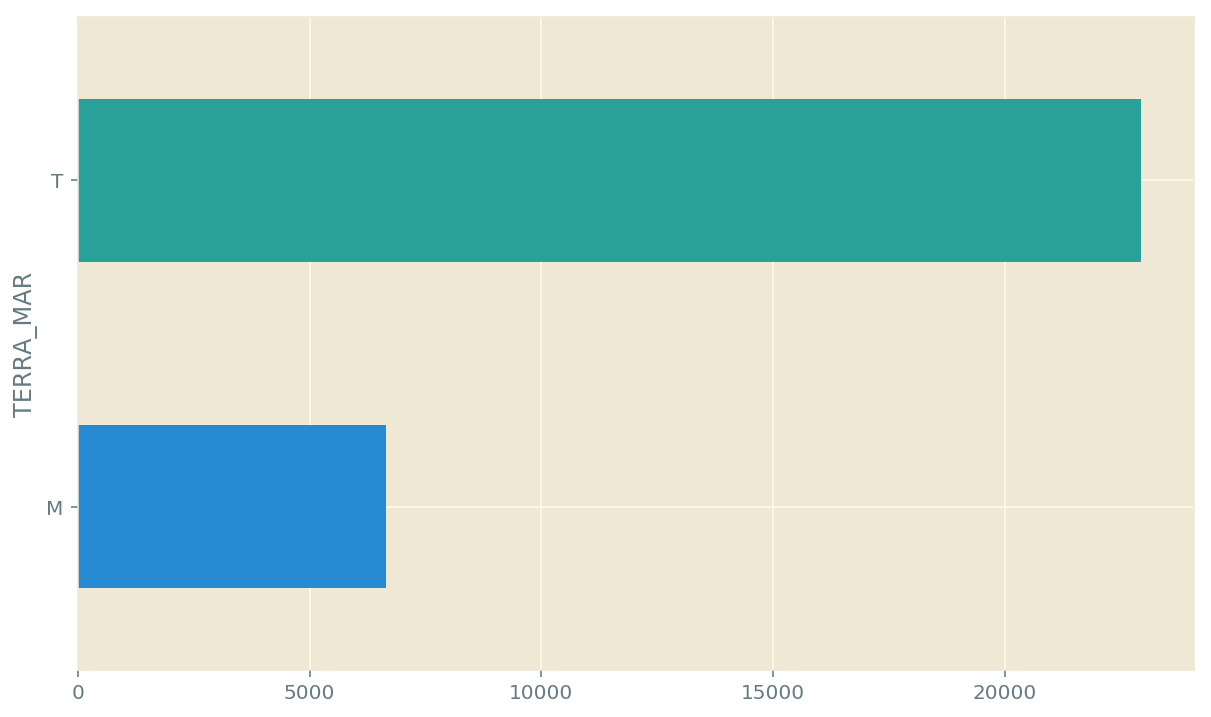

In [138]:
df.groupby('TERRA_MAR').size().sort_values().plot(kind='barh', figsize=(10,6));

### 13. Bacias com mais atividades ao longo da história

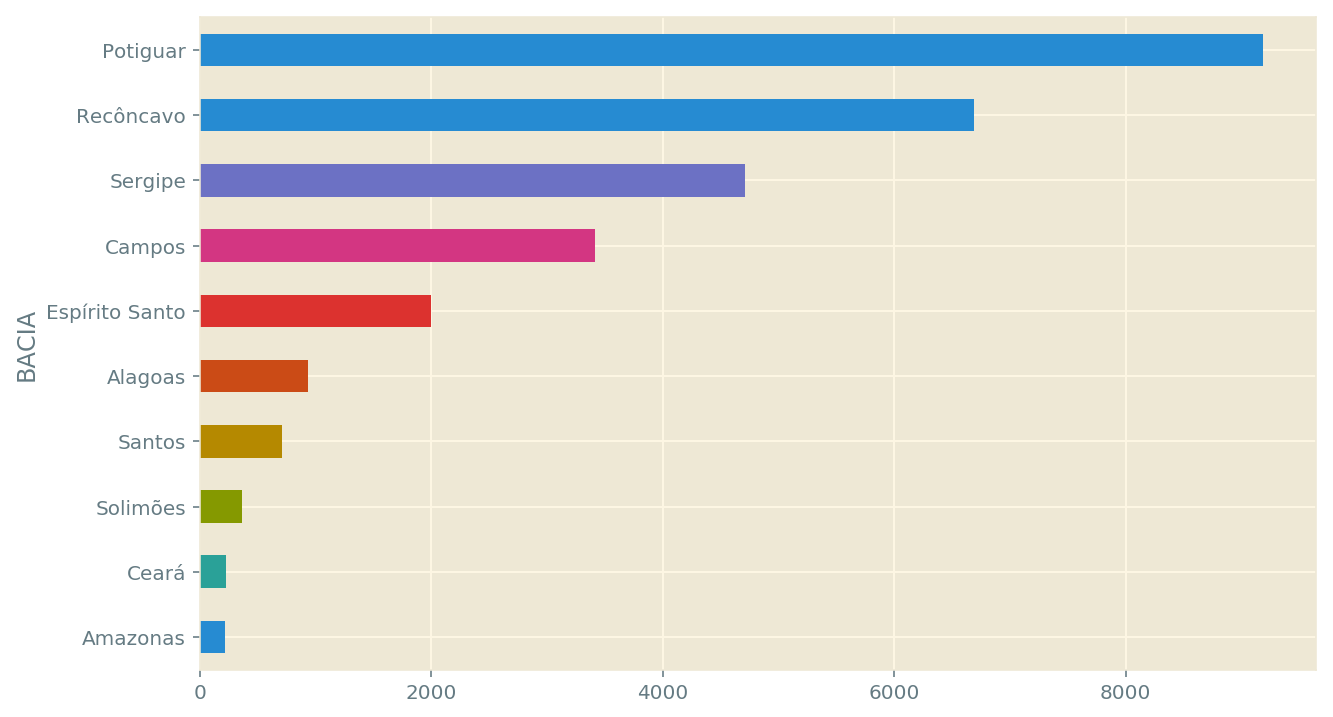

In [134]:
df.groupby('BACIA').size().sort_values().tail(10).plot(kind='barh', figsize=(10,6));

### 14. Categorias com mais atividades ao longo da história

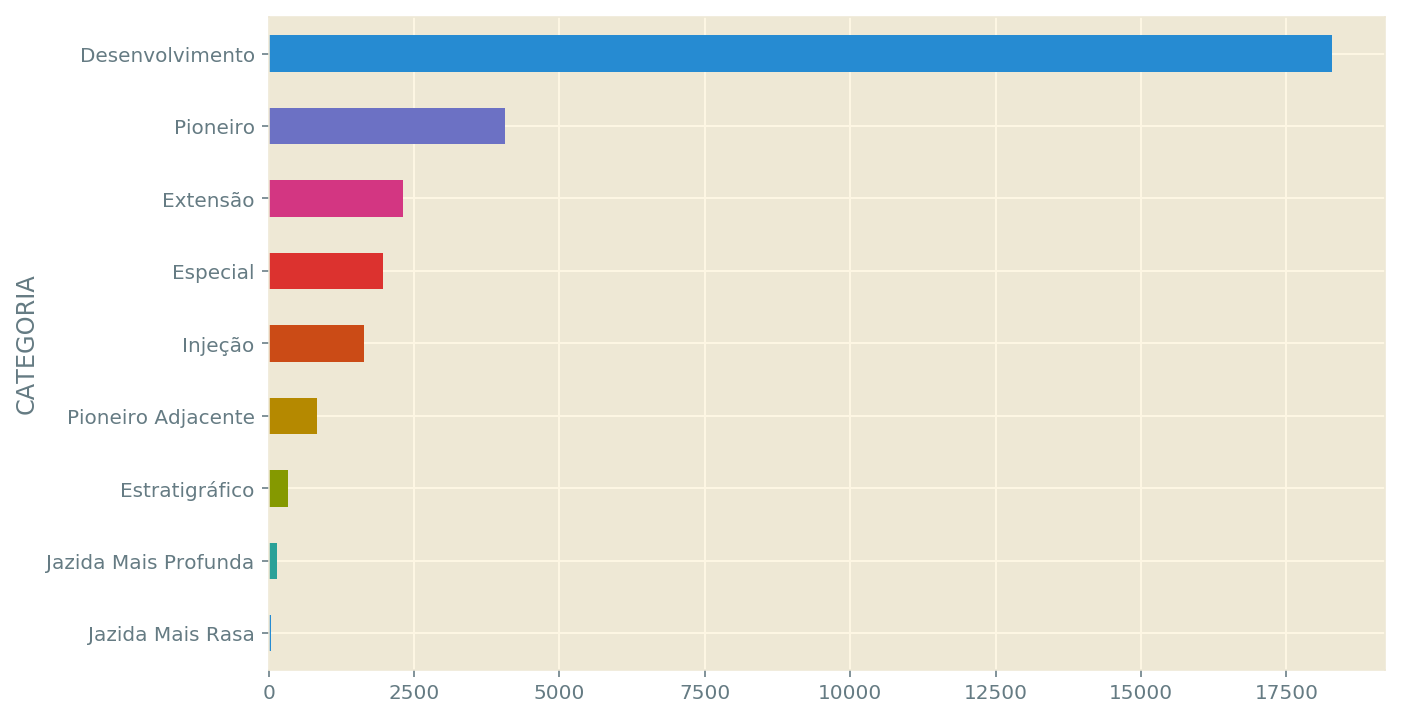

In [135]:
df.groupby('CATEGORIA').size().sort_values().plot(kind='barh', figsize=(10,6));

### 15. Estados com mais atividades de desenvolvimento ao longo da história

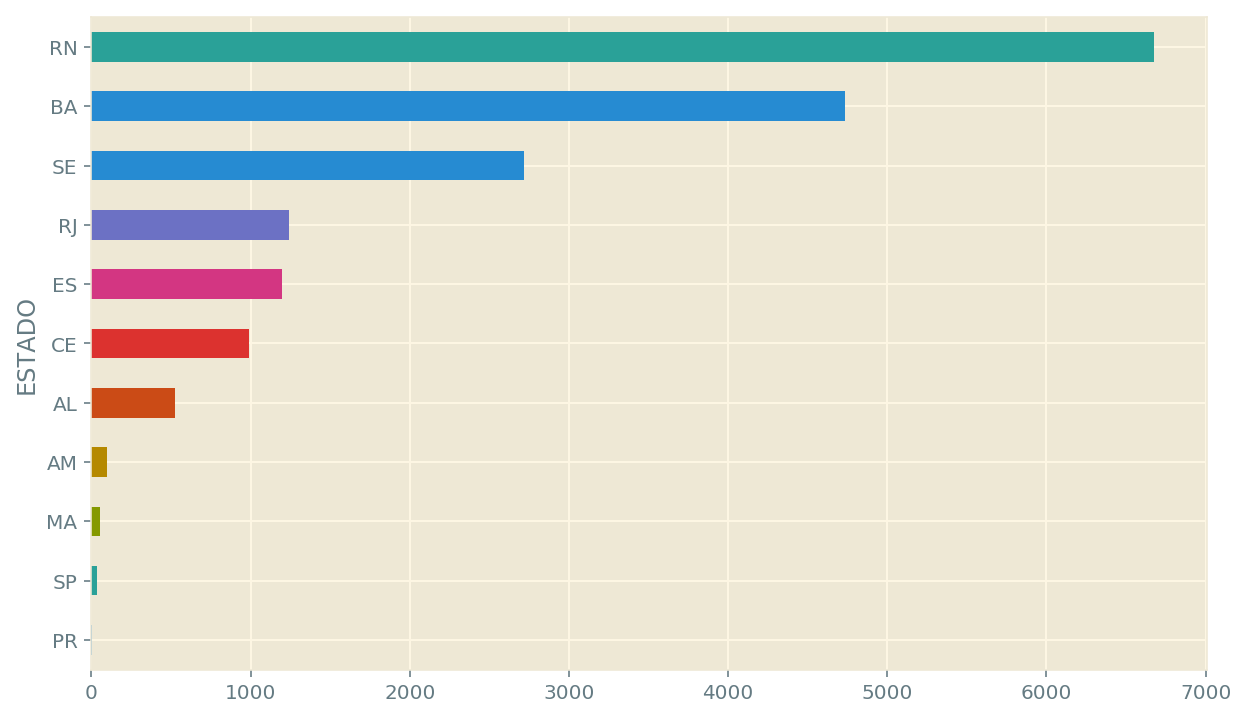

In [146]:
df.query('CATEGORIA == "Desenvolvimento"').groupby('ESTADO').size().sort_values().plot(kind='barh', figsize=(10,6));